In [1]:
# 필요 라이브러리 import

import pandas as pd
import json
import glob
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [2]:
# 사용할 엑셀 파일을 모두 all_files에 저장

all_files = glob.glob('./KoreanKERIS*.xls')
all_files

['.\\KoreanKERIS(1).xls',
 '.\\KoreanKERIS(2).xls',
 '.\\KoreanKERIS(3).xls',
 '.\\KoreanKERIS(4).xls',
 '.\\KoreanKERIS.xls']

In [3]:
# 빈배열을 만들고 병합한 엑셀 데이터의 내용을 읽어 데이터 프레임으로 전환 후 append

all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[1]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,우리나라 자본시장에서 회계보수주의가 기업의 투자효율성 및 채권발행에 미치는 영향에 ...,김병호,한국기업경영학회,2022
1,NaN,2,기업의 투자효율성이 신용등급에 미치는 영향 = Investment Efficienc...,이승현,한국국제회계학회,2020
2,NaN,3,CVC 투자 포트폴리오 결정요인 연구 : 여유자원과 환경 불확실성의 영향,강신형(Shinhyung Kang),한국인적자원개발학회,2021
3,NaN,4,간접투자법상 투자자 보호의무와 선관주의의무의 부담 주체 - 대법원 2020. 2....,장근영,한국상사법학회,2020
4,NaN,5,중소벤처기업 투자단계별 특성의 실증적 비교분석 - 최근 3개년도 투자유치기업을 중...,이동운,충북대학교 국가미래기술경영연구소,2022
...,...,...,...,...,...,...
95,NaN,96,Industry 4.0 기반의 대 인도네시아 해외직접투자와 글로벌 밸류체인 간의 관련성,김창봉(Chang Bong Kim),국제e-비즈니스학회,2020
96,NaN,97,산업 내 경쟁유형이 기업의 현금보유수준과 투자비효율성간의 관계에 미치는 영향,"권광현(Kwon, Kwang-Hyon)",한국산업경제학회,2020
97,NaN,98,투자자-국가 분쟁 해결 제도(ISDS)에 관한 연구: 투자 유치국의 국내정치적 요인...,유성훈,서울대학교 국제학연구소,2022
98,NaN,99,서울시 주택 예상투자이익 추정과 영향요인에 대한 시론적 분석: 2010~2018년 ...,안혜성,한국지역학회,2020


In [4]:
# 100개씩 저장한 데이터 프레임을 하나의 배열 all_files_data_concat에 병합

all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index = True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,우리나라 자본시장에서 회계보수주의가 기업의 투자효율성 및 채권발행에 미치는 영향에 ...,김병호,한국기업경영학회,2022
1,NaN,2,기업의 투자효율성이 신용등급에 미치는 영향 = Investment Efficienc...,이승현,한국국제회계학회,2020
2,NaN,3,CVC 투자 포트폴리오 결정요인 연구 : 여유자원과 환경 불확실성의 영향,강신형(Shinhyung Kang),한국인적자원개발학회,2021
3,NaN,4,간접투자법상 투자자 보호의무와 선관주의의무의 부담 주체 - 대법원 2020. 2....,장근영,한국상사법학회,2020
4,NaN,5,중소벤처기업 투자단계별 특성의 실증적 비교분석 - 최근 3개년도 투자유치기업을 중...,이동운,충북대학교 국가미래기술경영연구소,2022
...,...,...,...,...,...,...
494,NaN,96,암호화폐 투자에서 투자자들의 투기적 행동을 야기하는 원인 규명: 제한된 합리성 이론...,김은영,한국경영정보학회,2020
495,NaN,97,기후위기의 대책: 사회책임투자의 이해와 적용,"박정윤(Park, Jeong Yun)",행복한부자학회,2021
496,NaN,98,EU의 외국인직접투자(FDI)에 대한 심사체계에 대하여 - Regulation EU...,황선영(Seon-Young Hwang),한국국제경제법학회,2021
497,NaN,99,중국의 투자동기별 해외직접투자가 수출에 미치는 영향에 대한 연구 - 일대일로 가입국...,장염교,한국무역보험학회,2020


In [5]:
# all_files_data_concat의 columns 중 “제목＂만 추출하여 all_title에 저장

all_title = all_files_data_concat['제목']
all_title

0      우리나라 자본시장에서 회계보수주의가 기업의 투자효율성 및 채권발행에 미치는 영향에 ...
1      기업의 투자효율성이 신용등급에 미치는 영향 = Investment Efficienc...
2               CVC 투자 포트폴리오 결정요인 연구 : 여유자원과 환경 불확실성의 영향
3      간접투자법상 투자자 보호의무와 선관주의의무의 부담 주체  - 대법원 2020. 2....
4      중소벤처기업 투자단계별 특성의 실증적 비교분석  - 최근 3개년도 투자유치기업을 중...
                             ...                        
494    암호화폐 투자에서 투자자들의 투기적 행동을 야기하는 원인 규명: 제한된 합리성 이론...
495                             기후위기의 대책: 사회책임투자의 이해와 적용
496    EU의 외국인직접투자(FDI)에 대한 심사체계에 대하여 - Regulation EU...
497    중국의 투자동기별 해외직접투자가 수출에 미치는 영향에 대한 연구 - 일대일로 가입국...
498    외국인 투자자의 대규모 지분인수가 기업의 주가에 미치는 영향 : 정보비대칭과 주주권...
Name: 제목, Length: 499, dtype: object

In [6]:
# 모든 제목을 하나의 문자열에 담기위해 stirng 객체 message를 생성하고
# 리스트로 이루어진 all_title을 message에 병합 (+)
# 병합할때 문자, 숫자, 영어 외 모두 공백으로 치환(\w은 문자,숫자,_를 의미)

message = ""
for item in all_title:
    message = message + re.sub(r'[^\w]',' ',item) + ' '

In [7]:
message

'우리나라 자본시장에서 회계보수주의가 기업의 투자효율성 및 채권발행에 미치는 영향에 대한 실증적 분석   The Association Between Accounting Conservatism and Investment Efficiency  amp  Bond Issue in Korean Capital Market 기업의 투자효율성이 신용등급에 미치는 영향   Investment Efficiency and Credit Rating of Firms CVC 투자 포트폴리오 결정요인 연구   여유자원과 환경 불확실성의 영향 간접투자법상 투자자 보호의무와 선관주의의무의 부담 주체    대법원 2020  2  27  선고 2016다223494 판결을 소재로     Who Has the Duty to Protect Investors and the Duty of Care under the Indirect Investment Asset Management Business Act    Supreme Court Decision 2020  2  27  2016Da223494   중소벤처기업 투자단계별 특성의 실증적 비교분석    최근 3개년도 투자유치기업을 중심으로     An empirical comparative analysis of the characteristics of SMEs by investment stage 애널리스트 투자의견 변경이 금융시장과 투자자 심리에 미치는 영향   The Impact of Analyst Recommendation Changes on the Korean Financial Market and Sentiment 중국 증권투자펀드 시장의 투자자 군집행동에 관한 연구   A Study on the Herd Behavior of Investors in the Chinese Securities  Investment Fund Market 관련다각화 및 관계기업이 보유한 무형자산이 관계기업투자주식 공정가치정보의 가치관련성에 미치는 영향 창업기업관점에서 바라본

In [8]:
# 품사 태깅 패키지인 Okt를 사용하여 명사만 추출해 message_N에 저장

nlp = Okt()
message_N = nlp.nouns(message)
message_N

['우리나라',
 '자본시장',
 '회계',
 '보수',
 '주의',
 '기업',
 '투자',
 '효율',
 '및',
 '채권',
 '발행',
 '영향',
 '대한',
 '실증',
 '분석',
 '기업',
 '투자',
 '효율',
 '신용등급',
 '영향',
 '투자',
 '포트폴리오',
 '결정',
 '요인',
 '연구',
 '유자',
 '환경',
 '불확실',
 '성의',
 '영향',
 '간접',
 '투자',
 '법',
 '투자자',
 '보호',
 '의무',
 '선관주의의무',
 '부담',
 '주체',
 '대법원',
 '선고',
 '판결',
 '소재',
 '중소',
 '벤처기업',
 '투자',
 '단계',
 '별',
 '특성',
 '실증',
 '비교',
 '분석',
 '최근',
 '개',
 '년도',
 '투자',
 '유치',
 '기업',
 '중심',
 '애널',
 '리스트',
 '투자',
 '의견',
 '변경',
 '금융시장',
 '투자자',
 '심리',
 '영향',
 '중국',
 '증권',
 '투자',
 '펀드',
 '시장',
 '투자자',
 '군집',
 '행동',
 '관',
 '연구',
 '관련',
 '다각',
 '및',
 '관계',
 '기업',
 '보유',
 '무형',
 '산이',
 '관계',
 '기업',
 '투자',
 '주식',
 '공정',
 '가치',
 '정보',
 '가치',
 '관련성',
 '영향',
 '창업',
 '기업',
 '관점',
 '투자자',
 '투자',
 '결정',
 '요인',
 '관',
 '연구',
 '물',
 '산업',
 '창업',
 '기업',
 '중심',
 '금융',
 '소비자',
 '개인',
 '성향',
 '투자',
 '행동',
 '영향',
 '관',
 '연구',
 '베이비붐',
 '세대',
 '중심',
 '기업',
 '벤처캐피탈',
 '모험',
 '투자',
 '미국',
 '기업',
 '벤처캐피탈',
 '투자',
 '산업',
 '특성',
 '투자',
 '경험',
 '영향',
 '탐색',
 '인구',
 '구조',
 '직',
 '간

In [9]:
# 추출한 명사를 Counter 메서드를 사용하여 빈도 계산

count = Counter(message_N)
count

Counter({'우리나라': 2,
         '자본시장': 8,
         '회계': 12,
         '보수': 4,
         '주의': 7,
         '기업': 146,
         '투자': 422,
         '효율': 43,
         '및': 70,
         '채권': 7,
         '발행': 5,
         '영향': 146,
         '대한': 71,
         '실증': 14,
         '분석': 76,
         '신용등급': 3,
         '포트폴리오': 7,
         '결정': 30,
         '요인': 49,
         '연구': 129,
         '유자': 2,
         '환경': 8,
         '불확실': 7,
         '성의': 8,
         '간접': 5,
         '법': 30,
         '투자자': 100,
         '보호': 25,
         '의무': 12,
         '선관주의의무': 2,
         '부담': 2,
         '주체': 4,
         '대법원': 3,
         '선고': 3,
         '판결': 3,
         '소재': 5,
         '중소': 5,
         '벤처기업': 5,
         '단계': 5,
         '별': 18,
         '특성': 13,
         '비교': 21,
         '최근': 2,
         '개': 4,
         '년도': 2,
         '유치': 10,
         '중심': 113,
         '애널': 3,
         '리스트': 3,
         '의견': 3,
         '변경': 2,
         '금융시장': 3,
         '심리': 15,
 

In [10]:
# key(word) : value(count) 형식으로 만들기 위해 dictionary 객체 word_count를 생성
# 생성한 word_count에 tag(word)와 counts(count)저장

word_count = dict()
for tag, counts in count.most_common(80):
    if(len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

투자 : 422
기업 : 146
영향 : 146
연구 : 129
중심 : 113
투자자 : 100
분석 : 76
대한 : 71
요인 : 49
효율 : 43
성과 : 43
해외 : 41
효과 : 37
사례 : 35
한국 : 35
방안 : 34
제도 : 33
중국 : 31
국제 : 31
결정 : 30
관계 : 29
직접투자 : 27
보호 : 25
산업 : 24
전략 : 24
사업 : 24
국가 : 24
주식 : 22
국내 : 22
기관 : 22
외국인 : 22
비교 : 21
가치 : 21
투자가 : 21
관련 : 20
분쟁 : 20
시장 : 19
책임 : 18
개선 : 18
이익 : 18
정책 : 17
심리 : 15
펀드 : 15
행동 : 15
활동 : 15
연구개발 : 15
활용 : 15
실증 : 14
미국 : 14
정부 : 14
경영 : 14
부동산 : 14
특성 : 13
증권 : 13
도입 : 13
에너지 : 13
수준 : 13
자산 : 13
사회 : 13
회계 : 12
의무 : 12
위험 : 12
외국인투자 : 12
현황 : 12
규제 : 12
거래 : 12
변화 : 12
관련성 : 11
민간 : 11
지역 : 11
미래 : 11


In [11]:
# 레이블에 한글을 표시하기 위해 한글 폰트 맑은 고딕체 설정

font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

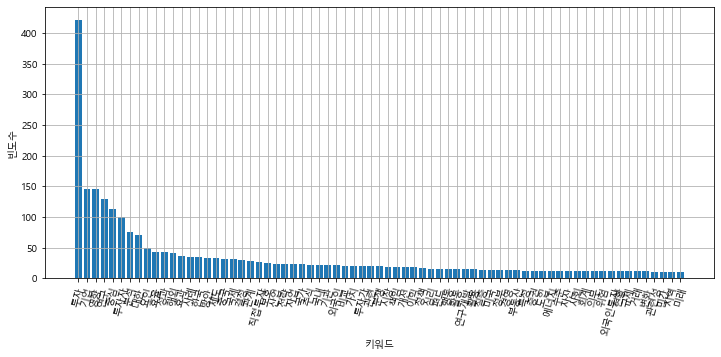

In [12]:
# x축을 키워드, y축을 빈도수로 갖는 히스토그램 생성
# 이때 빈도수를 내림차순으로 정렬

plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '75')
plt.show()

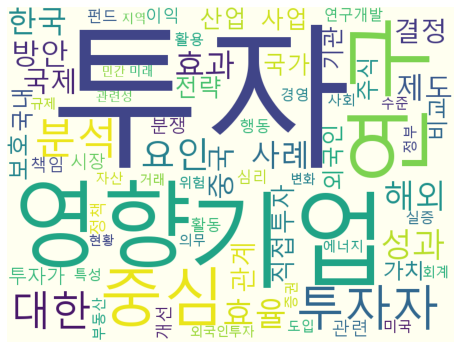

In [13]:
# 워드 클라우드 객체 wc를 만들고
# 앞서 구한 단어와 빈도수를 갖는 word_count를 매개변수로 대입하여 cloud 객체 생성
# plt.imshow(cloud)를 통해 워드 클라우드 시각화

wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [14]:
# 시각화한 워드 클라우드를 jpg 파일로 저장

cloud.to_file('투자_cloud.jpg')